In [1]:
# Check Scipy version
import scipy
print(scipy.__version__)

1.6.2


Tutorial
https://docs.anaconda.com/anaconda/navigator/tutorials/manage-packages/

In [2]:
# Import pandas, numpy, scip.stats
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

## One Sample T Test

- According to Reynolds Intellectual Ability Scales, the average VIQ (Verbal IQ scores based on the four Wechsler (1981) subtests) is about 109.

- In our sample data, we have a sample of 40 cases. 
- Let's test if the average VIQ of people is significantly bigger than 109.

In [4]:
# sample 40 kişiden oluşuyor bundan dolayı one sample T testini kullanacağız.

# Brain size and weight and IQ data (Willerman et al. 1991)
df = pd.read_csv("brain_size.csv", sep=";", na_values = ".", index_col = 0)
df.head(5)

,Gender,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
1,Female,133,132,124,118.0,64.5,816932
2,Male,140,150,124,NaN,72.5,1001121
3,Male,139,123,150,143.0,73.3,1038437
4,Male,133,129,128,172.0,68.8,965353
5,Female,137,132,134,147.0,65.0,951545


In [ ]:
# H0: mu = 109
# H1: mu! > 109

In [14]:
# Calculate the mean of VIQ

xbar = df.VIQ.mean()

xbar

112.35

In [15]:
# Calculate the std of VIQ

s = df.VIQ.std()

s

23.616107063199735

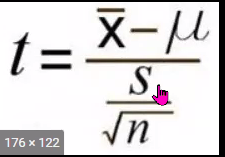

In [10]:
df.shape

(40, 7)

In [19]:
# Calculate the test statistic

t_test = (xbar-109)/ (s/np.sqrt(df.shape[0]))


In [20]:
#test statistic: 

t_test

0.8971529586323553

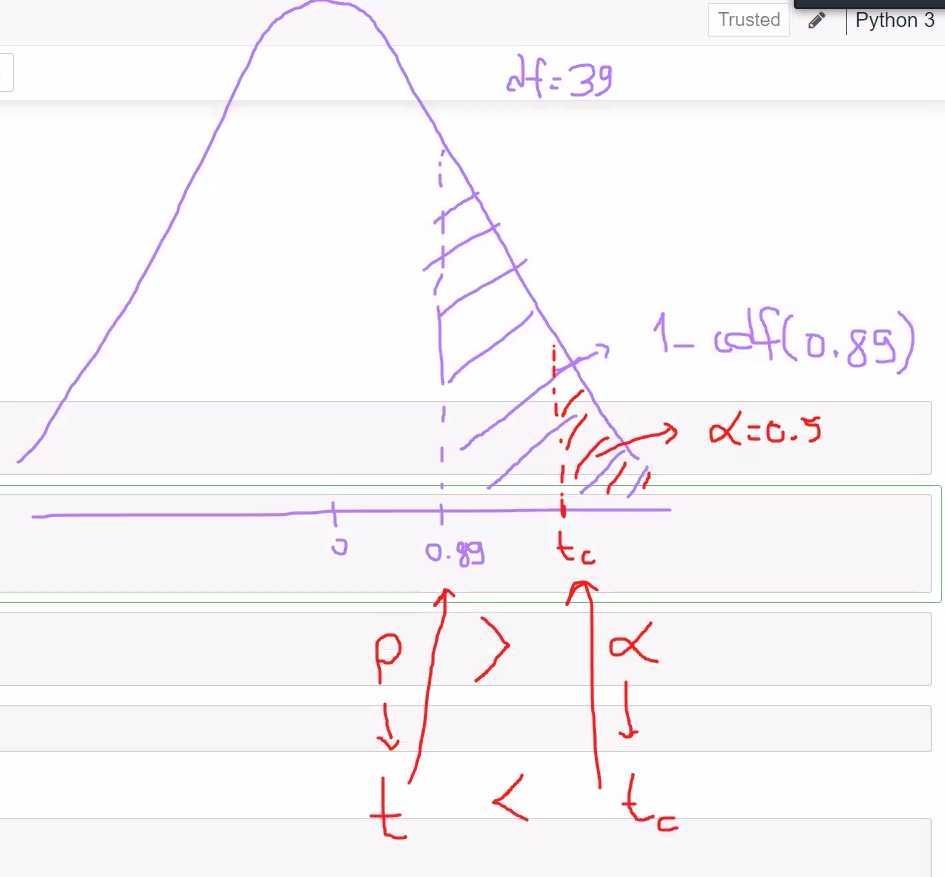

In [ ]:
# olasılıktan p değerine geçiş yaparken ppf kullanırız.
# p değerinden ise olasılığı geçiş yaparken cdf kullanırız.

In [21]:
# Calculate p-value bulacağız. yukarıdaki t_testin df= n-1 yani 39 olan 

1 - stats.t.cdf(t_test, 39) # df burada 39 dur. pvalue 0.05 ten çok büyük olduğundan dolayı H0 reddemiyoruz.

# fail to reject = retain

0.18757115929257173

In [23]:
# Use stats.ttest_1samp() to calculate the test statistic and p-value

oneSamp = stats.ttest_1samp(df.VIQ, 109, alternative="greater") # burada greater olmasının sebebi 109 dan büyük olup olmadığını soruyor.

oneSamp

Ttest_1sampResult(statistic=0.897152958632355, pvalue=0.1875711592925718)

In [24]:
#Display p-value

oneSamp.pvalue

0.1875711592925718

In [26]:
# Compare p-value and alpha

alpha = 0.05

if oneSamp.pvalue < alpha:
    print("Reject the Null")
else:
    print("Fail to reject")

Fail to reject


# Independent Samples T Test

## Arsenic Example

- Arsenic concentration in public drinking water supplies is a potential health risk. 
- An article in the Arizona Republic (May 27, 2001) reported drinking water arsenic concentrations in parts per billion (ppb) for 10 metropolitan Phoenix communities and 10 communities in rural Arizona.
- You can find the data in CSV file.

Determine if there is any difference in mean arsenic concentrations between metropolitan Phoenix communities and communities in rural Arizona.

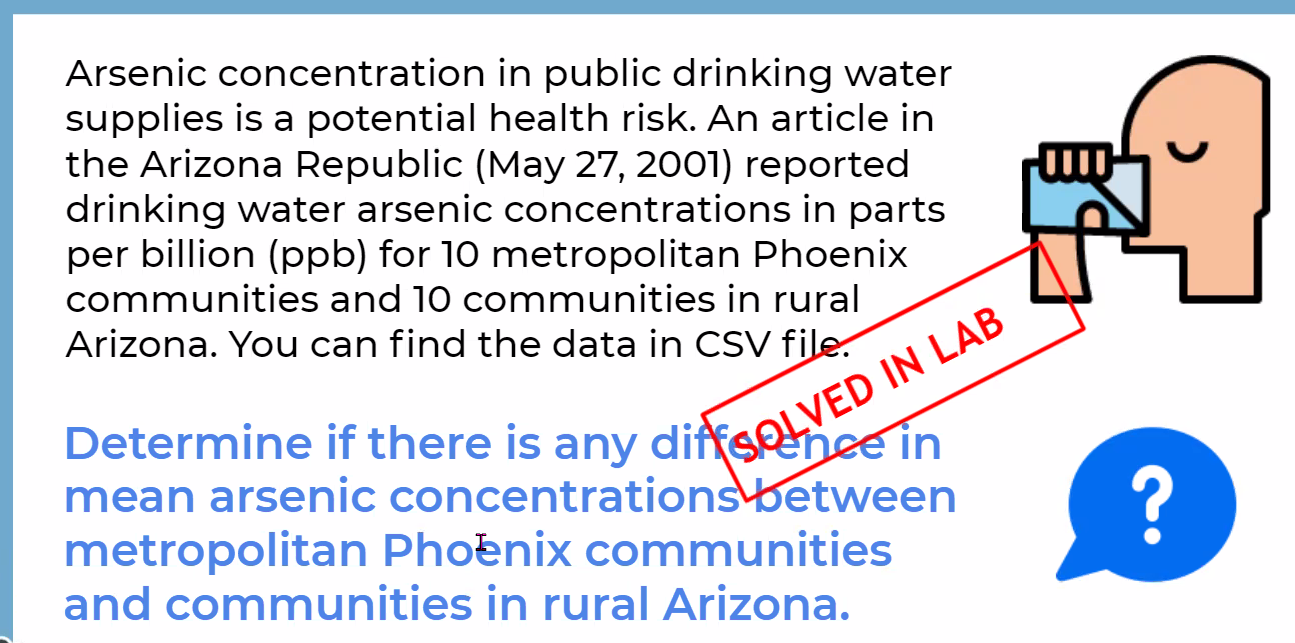

In [27]:
#Import arsenic dataset

arsenic = pd.read_csv("arsenic.csv")

In [28]:
arsenic

,Metro Phoenix,x1,Rural Arizona,x2
0,Phoenix,3,Rimrock,48
1,Chandler,7,Goodyear,44
2,Gilbert,25,New River,40
3,Glendale,10,Apache Junction,38
4,Mesa,15,Buckeye,33
5,Paradise Valley,6,Nogales,21
6,Peoria,12,Black Canyon City,20
7,Scottsdale,25,Sedona,12
8,Tempe,15,Payson,1
9,Sun City,7,Casa Grande,18


burada x1bar sample mean, mu1 ise populasyon mean dir. Alternatif hipotez çift tailed dir. Bu örnekte varyanslar ile ilgili bir husus yoksa varyansların homojenliğine bakmamız bunun içinde bir hipotez kurmamız gerekir. Bunun içinde levene testini kullanacağız.

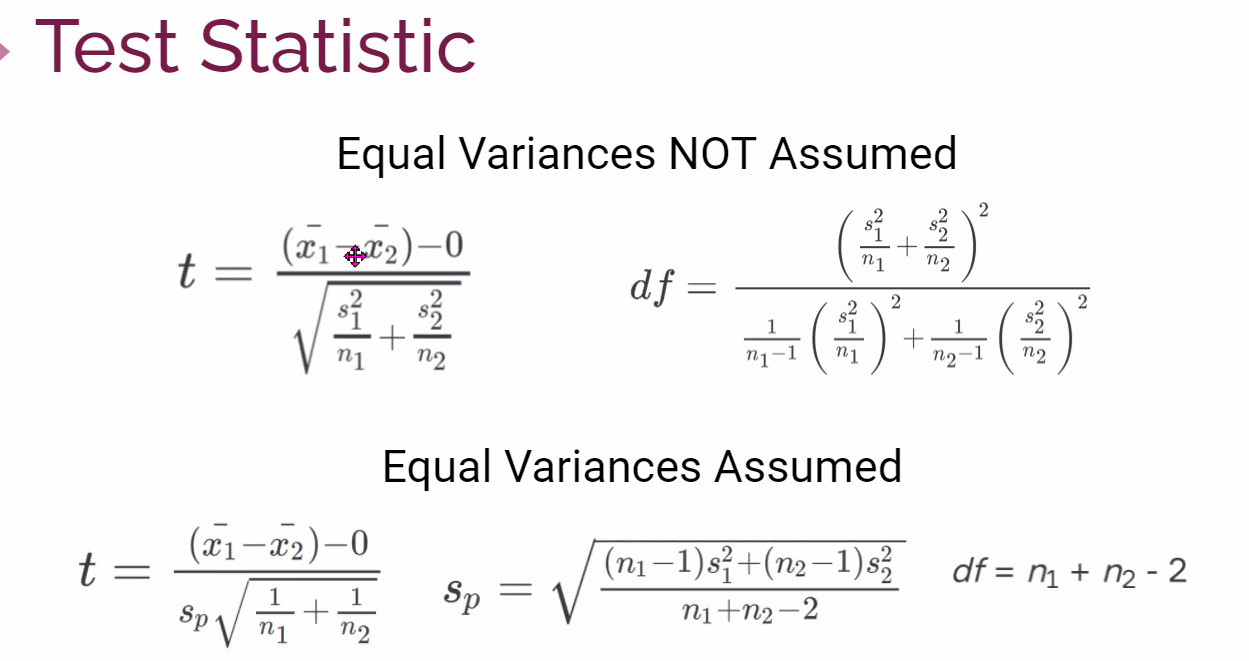

In [30]:
#Perform Levene test for equal variances
#H0: The population variances are equal
#H1: There is a difference between the variances in the population
#The small p-value suggests that the populations do not have equal variances.

leveneTest = stats.levene(arsenic.x1, arsenic.x2)

leveneTest

LeveneResult(statistic=7.7015516672169, pvalue=0.012482954069299166)

Burada pvalue alfadan küçük çıktığından dolayı H0 hipotezini reddediyoruz. iki grubun varyansları birbirinden farklıymış.

In [31]:
# average Metro Phoenix
arsenic.x1.mean()

12.5

In [32]:
# average Rural Arizona
# average Metro Phoenix
arsenic.x2.mean()

27.5

Calculate the T-test for the means of two independent samples of scores.

In [ ]:
# H0: mu1 = mu2
# H1: mu1 != mu2

In [35]:
# Calculate test statistics using stats.ttest_ind()

indTest = stats.ttest_ind(arsenic.x1, arsenic.x2, equal_var = False) # yukarıda varyanslar birbirinden farklı olduğundan dolayı equal_var FALSE seçiyoruz.

In [ ]:
# pvalue değeri alfadan 0.05 den küçük çıktığından dolayı H0 reddediyoruz.

In [37]:
indTest.statistic

-2.7669395785560558

In [36]:
indTest.pvalue

0.015827284816100885

In [38]:
# Decision

alpha = 0.05

if indTest.pvalue < alpha:
    print("Reject the Null")
else:
    print("Fail to reject")

Reject the Null


% 95 güvenilirlikte iki bölgenin ortalamaları arasında istatiksel olarak anlamlı bir fark vardır.

We can reject the null hypothesis and conclude that we are 95% confident that there is a statistically significant difference in mean arsenic concentrations between metropolitan Phoenix communities and communities in rural Arizona.

# Paired (Dependent) Samples T Test

## Prozac Data

- Let us consider a simple example of what is often termed "pre/post" data or "pretest/posttest" data. 
- Suppose you wish to test the effect of Prozac on the well-being of depressed individuals, using a standardised "well-being scale" that sums Likert-type items to obtain a score that could range from 0 to 20. 
- Higher scores indicate greater well-being (that is, Prozac is having a positive effect). 
- While there are flaws in this design (e.g., lack of a control group) it will serve as an example of how to analyse such data.

Determine if Prozac enhances well-being in depressed individuals. Use   0.05


In [40]:
# read prozac dataset
prozac = pd.read_csv("prozac.csv")

In [41]:
prozac

,moodpre,moodpost,difference
0,3,5,2
1,0,1,1
2,6,5,-1
3,7,7,0
4,4,10,6
5,3,9,6
6,2,7,5
7,1,11,10
8,4,8,4


In [ ]:
# H0: d_bar = 0        MUpre = MUpost
# H1: d_bar > 0        MUpre != MUpost

In [44]:
# Calculate test statistics using stats.ttest_rel()  
# moodpost - moodpre

pairedtest = stats.ttest_rel(prozac.moodpost, prozac.moodpre, alternative="greater")

pvalue alfadan küçük olduğundan dolayı H0 hipotezini reddediyoruz.

In [43]:
# moodpre - moodpost

# H0: d_bar = 0        
# H1: d_bar < 0

stats.ttest_rel(prozac.moodpre, prozac.moodpost, alternative="less")


Ttest_relResult(statistic=-3.1428571428571423, pvalue=0.006872912197394244)

In [45]:
# Decision

alpha = 0.05

if pairedtest.pvalue < alpha:
    print("Reject the Null")
else:
    print("Fail to reject")

Reject the Null


In [ ]:
% 95 güvenilirlikle prozac tedavisi istatiksel olarak prozac tedavisi uygulanan bireylerde fayda sağlamıştır.